In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from scipy import interp
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle

In [8]:
data = pd.read_csv("USvideos.csv")

In [5]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [54]:
def roc_scores(y_test, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

def histogram_feature(feature):
    fig, ax = plt.subplots()
    plt.hist(data[feature])
    plt.xlabel(feature)
    plt.ylabel('No. of Videos')

def histogram_log_feature(feature):
    fig, ax = plt.subplots()
    plt.hist(data[feature], log=True)
    plt.xlabel(feature)
    plt.ylabel('Log(No. of Videos)')

def bivariate_scatterplot(feature1, feature2):
    fig, ax = plt.subplots()
    plt.scatter(x=data[feature1], y=data[feature2], edgecolor="#000000", linewidths=0.5)
    ax.set(xlabel=feature1, ylabel=feature2)

def kdeplot(feature, data):
    sns.kdeplot(data[feature], shade=true)

def countplot(feature, data):
    sns.countplot(x=feature, data=data, linewidth=5)

#generates an ROC curve for one feature
#args are false positive and true positve rate array for one class
#and the roc_auc for that class
def single_attribute_roc_curve(fpr_arr, tpr_arr, roc_auc_arr):
    
    plt.figure()
    lw = 2
    plt.plot(fpr_arr, tpr_arr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_arr)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    


def full_attr_roc_curve(fpr, tpr, roc_auc, y_test, y_score):
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    #grabs all unique false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    #interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'tan', 'rosybrown', 'lightcoral', 'maroon', 'peru',
                   'darkorange', 'gold', 'darkkhaki', 'lawngreen', 'turquoise', 'lightcyan', 'steelblue',
                    'slategray','indigo', 'violet', 'salmon', 'dodgerblue', 'darkgoldenrod' , 'fuschia', 'lime',
                   'yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()



In [12]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [16]:
iris = datasets.load_iris()

In [38]:
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = DecisionTreeClassifier()

y_score = classifier.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc[i])
    print(fpr[i])
    print(tpr[i])

1.0
[0. 0. 1.]
[0. 1. 1.]
0.9611111111111111
[0.         0.04444444 1.        ]
[0.         0.96666667 1.        ]
0.9485294117647057
[0.         0.01960784 1.        ]
[0.         0.91666667 1.        ]


In [1]:
import matplotlib.pyplot as plt
from itertools import cycle


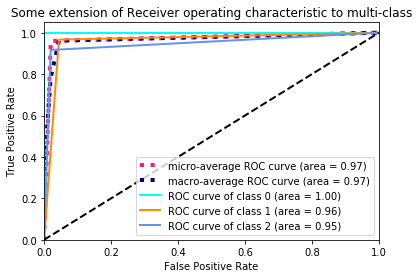

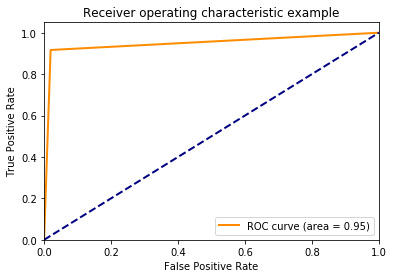

In [59]:
single_attribute_roc_curve(fpr[2], tpr[2], roc_auc[2])

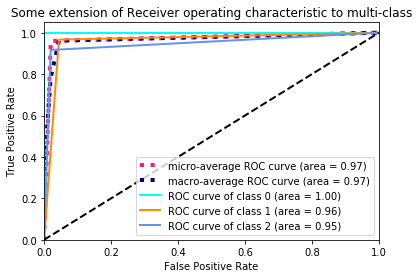

In [77]:
full_attr_roc_curve(fpr, tpr, roc_auc, y_test, y_score)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [95]:
cdf = data["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
.to_frame() \
.reset_index() \
.rename(columns={"index": "year", "trending_date": "No_of_videos"})

In [96]:
cdf

,year,No_of_videos
0,2018,31349
1,2017,9600


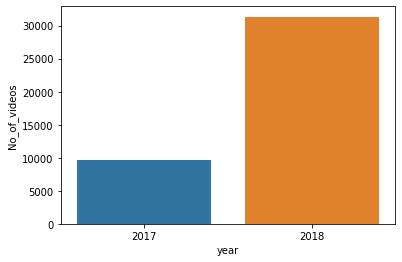

In [97]:
sns.barplot(x="year", y="No_of_videos", data=cdf)

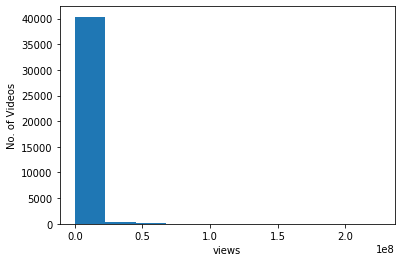

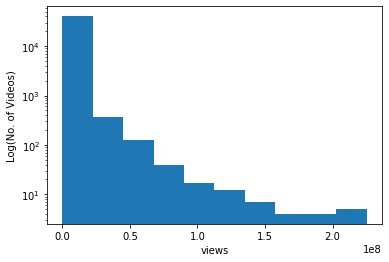

In [36]:

histogram_feature('views')
histogram_log_feature('views')

In [14]:
data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [23]:
def bivariate_scatterplot(feature1, feature2):
    fig, ax = plt.subplots()
    plt.scatter(x=data[feature1], y=data[feature2], edgecolor="#000000", linewidths=0.5)
    ax.set(xlabel=feature1, ylabel=feature2)

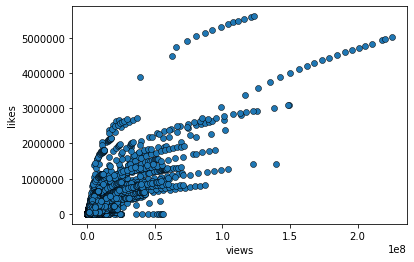

In [24]:
bivariate_scatterplot("views", "likes")

In [45]:
import json

with open("./US_category_id.json") as f:
    categories = json.load(f)['items']
    
categories

category_map = {}

for cat in categories:
    category_id = int(cat['id'])
    category_map[category_id] = cat['snippet']['title']

category_map
    

# cat_dict = {}
# for cat in categories:
#     cat_dict[int(cat["id"])] = cat["snippet"]["title"]
# data['category_name'] = data['category_id'].map(cat_dict)

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [27]:
data['category_name']

0              People & Blogs
1               Entertainment
2                      Comedy
3               Entertainment
4               Entertainment
5        Science & Technology
6               Entertainment
7        Science & Technology
8            Film & Animation
9             News & Politics
10                     Sports
11              Entertainment
12                      Music
13            News & Politics
14             Pets & Animals
15       Science & Technology
16                     Comedy
17                  Education
18       Science & Technology
19                  Education
20                  Education
21       Science & Technology
22                  Education
23              Howto & Style
24                     Comedy
25              Entertainment
26       Science & Technology
27              Howto & Style
28            News & Politics
29           Film & Animation
                 ...         
40919                  Gaming
40920                   Music
40921     

[Text(0, 0.5, 'No. of videos'), Text(0.5, 0, 'Category')]

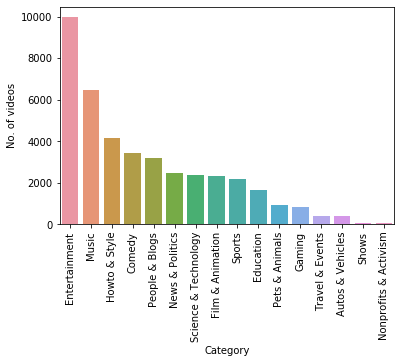

In [31]:
cdf = data["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
sns.barplot(x="category_name", y="No_of_videos", data=cdf, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Category", ylabel="No. of videos")

In [47]:
len(data['title'].unique())

6455

In [50]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')

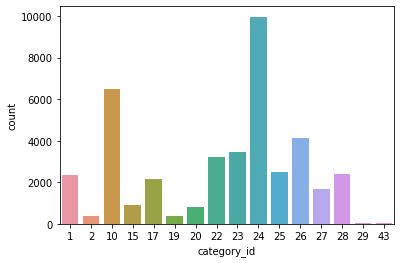

In [53]:
countplot('category_id', data)